In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import aux_functions as f

In [2]:
df = pd.read_csv("data/df_clean_all.csv", index_col = None)

In [3]:
df = df.reset_index(drop=True)

In [4]:
df.columns

Index(['Unnamed: 0', 'client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth',
       'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth',
       'logons_6_mnth', 'generation', 'testing_engagement', 'balance_level',
       'tenure', 'Variation', 'visitor_id', 'visit_id', 'process_step', 'time',
       'date'],
      dtype='object')

In [5]:
df = df.drop(columns='Unnamed: 0')

In [6]:
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,time,date
0,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,11:51:13,2017-04-02
1,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,11:47:50,2017-04-02
2,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,11:46:45,2017-04-02
3,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,step_3,11:23:08,2017-04-02
4,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,step_2,11:22:24,2017-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317118,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,step_2,23:59:15,2017-03-30
317119,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,step_1,23:58:51,2017-03-30
317120,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,start,23:58:40,2017-03-30
317121,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,start,23:55:11,2017-03-30


## 1. Who are the primary clients using this online process?

In [7]:
df_control = df[df['Variation']== 'Control']
df_test = df[df['Variation']== 'Test']

In [8]:
df_control

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,time,date
11,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,confirm,11:07:16,2017-05-21
12,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_3,11:04:53,2017-05-21
13,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_2,11:04:04,2017-05-21
14,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_1,11:03:31,2017-05-21
15,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,start,11:03:25,2017-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317097,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,confirm,19:06:55,2017-04-12
317098,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_3,19:05:14,2017-04-12
317099,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_2,19:04:29,2017-04-12
317100,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_1,19:04:07,2017-04-12


In [9]:
frequency_table_control, proportion_table_control, frequency_table_test, proportion_table_test = f.create_frequency_table(df_control, df_test, 'gendr')

C:\Users\Carlota\AppData\Local\Temp\ipykernel_10588\270614438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_control.index, y=frequency_table_control.values, palette="Set3");
C:\Users\Carlota\AppData\Local\Temp\ipykernel_10588\270614438.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_test.index, y=frequency_table_test.values, palette="Set3");


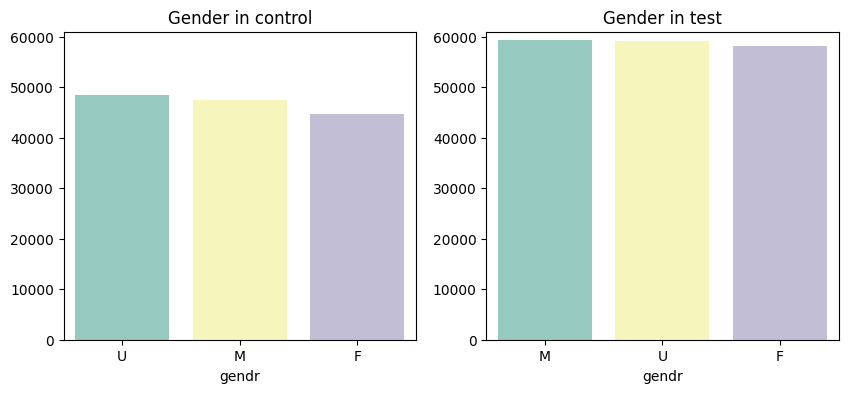

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=frequency_table_control.index, y=frequency_table_control.values, palette="Set3");
plt.ylim([0,61000])
plt.title('Gender in control')
plt.subplot(1,2,2)
sns.barplot(x=frequency_table_test.index, y=frequency_table_test.values, palette="Set3");
plt.ylim([0,61000])
plt.title('Gender in test')
plt.show()

In [11]:
# Frequency table for 'generation'
frequency_table_generation_test = df_test['generation'].value_counts()
# Calculating the proportion of each unique value in the 'Generation'
proportion_table_generation_test = df_test['generation'].value_counts(normalize=True)
frequency_table_generation_test, proportion_table_generation_test

(generation
 boomers         76496
 millennials     30371
 X generation    28651
 Z generation    27390
 70+             13733
 Name: count, dtype: int64,
 generation
 boomers         0.433059
 millennials     0.171936
 X generation    0.162199
 Z generation    0.155060
 70+             0.077745
 Name: proportion, dtype: float64)

In [12]:
# Frequency table for 'generation'
frequency_table_generation_control = df_control['generation'].value_counts()
# Calculating the proportion of each unique value in the 'Generation'
proportion_table_generation_control = df_control['generation'].value_counts(normalize=True)
frequency_table_generation_control, proportion_table_generation_control

(generation
 boomers         59322
 millennials     24793
 X generation    23406
 Z generation    22426
 70+             10535
 Name: count, dtype: int64,
 generation
 boomers         0.422275
 millennials     0.176485
 X generation    0.166612
 Z generation    0.159636
 70+             0.074992
 Name: proportion, dtype: float64)

In [13]:
frequency_table_generation_control, proportion_table_generation_control, frequency_table_generation_test, proportion_table_generation_test = f.create_frequency_table(df_control, df_test, 'generation')

C:\Users\Carlota\AppData\Local\Temp\ipykernel_10588\3191112310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_generation_control.index, y=frequency_table_generation_control.values, palette="Set3");
C:\Users\Carlota\AppData\Local\Temp\ipykernel_10588\3191112310.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_generation_test.index, y=frequency_table_generation_test.values, palette="Set3");


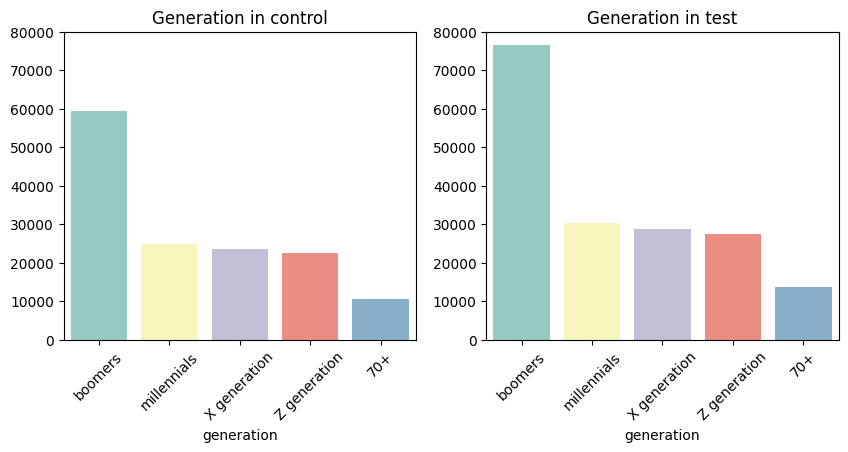

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=frequency_table_generation_control.index, y=frequency_table_generation_control.values, palette="Set3");
plt.ylim([0,80000])
plt.xticks(rotation=45)
plt.title('Generation in control')
plt.subplot(1,2,2)
sns.barplot(x=frequency_table_generation_test.index, y=frequency_table_generation_test.values, palette="Set3");
plt.ylim([0,80000])
plt.xticks(rotation=45)
plt.title('Generation in test')
plt.show()

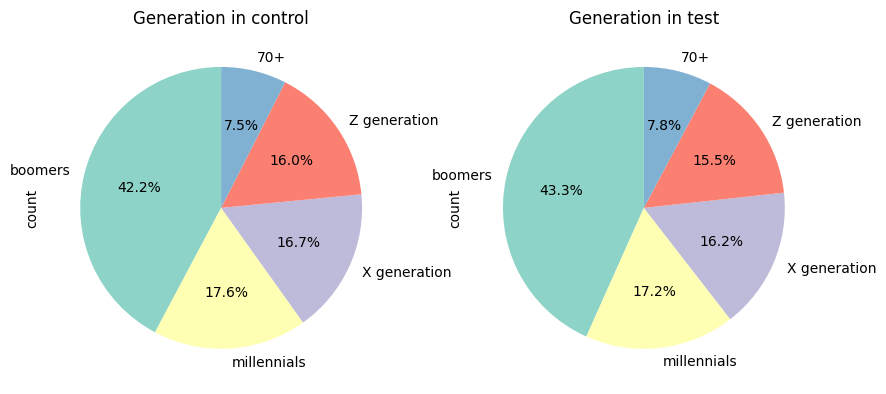

In [15]:
plt.figure(figsize=(10,9))
plt.subplot(1,2,1)
frequency_table_generation_control.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Generation in control')
plt.subplot(1,2,2)
frequency_table_generation_test.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Generation in test')
plt.show()

In [16]:
df_control.shape[0], df_test.shape[0]

(140482, 176641)

### 2. Are the primary clients younger or older, new or long-standing?

In [17]:
frequency_table_tenure_control, proportion_table_tenure_control, frequency_table_tenure_test, proportion_table_tenure_test = f.create_frequency_table(df_control, df_test, 'tenure')

In [18]:
frequency_table_tenure_control

tenure
5-10     52172
10-15    32295
20-50    23684
15-20    21863
0-5      10421
+50         47
Name: count, dtype: int64

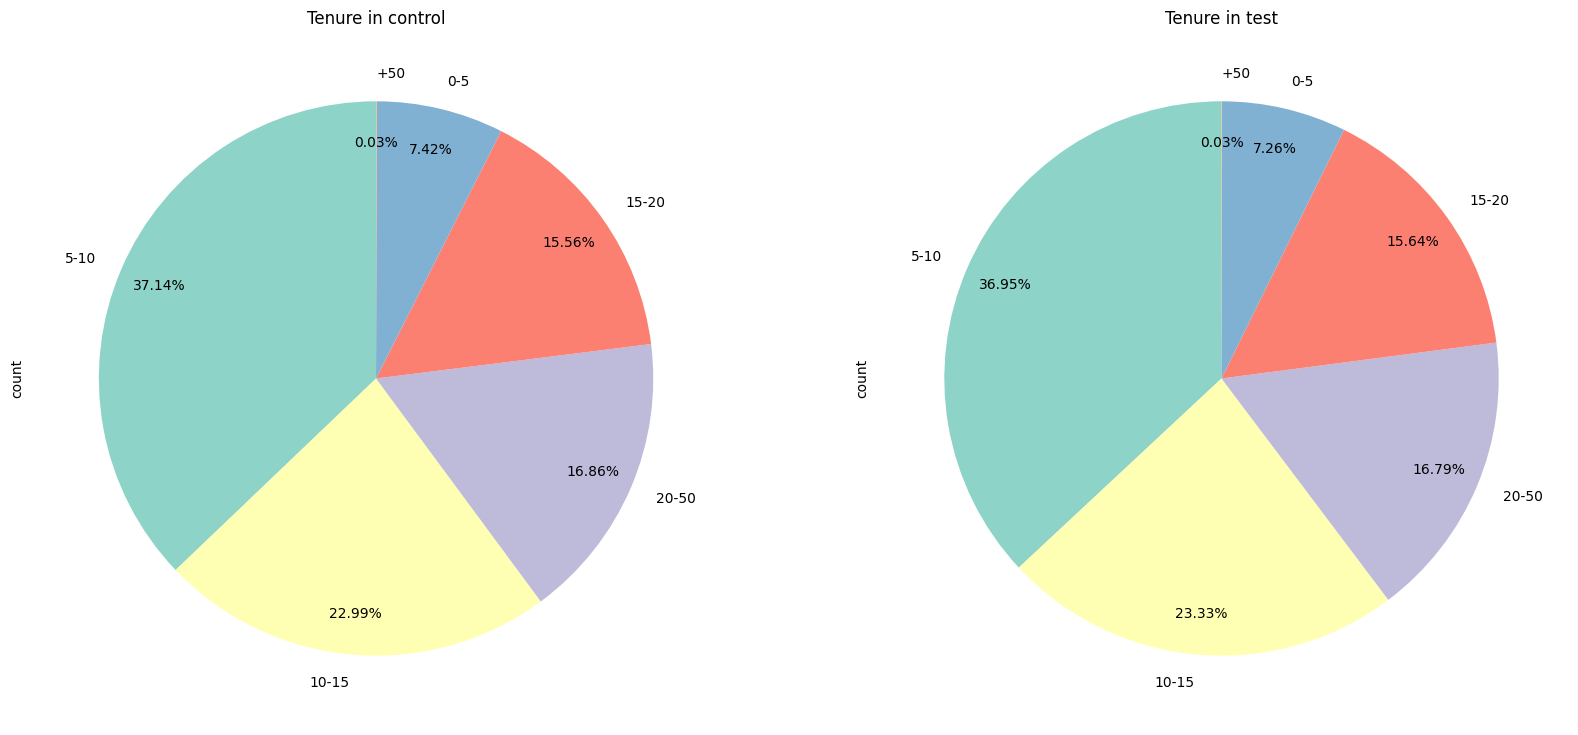

In [19]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
frequency_table_tenure_control.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1  )

plt.title('Tenure in control')
plt.subplot(1,2,2)
frequency_table_tenure_test.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1 )
plt.title('Tenure in test')
plt.show()

In [20]:
df_control.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'generation',
       'testing_engagement', 'balance_level', 'tenure', 'Variation',
       'visitor_id', 'visit_id', 'process_step', 'time', 'date'],
      dtype='object')

In [21]:
frequency_table_balance_level_control, proportion_table_balance_level_control, frequency_table_balance_level_test, proportion_table_balance_level_test = f.create_frequency_table(df_control, df_test, 'balance_level')

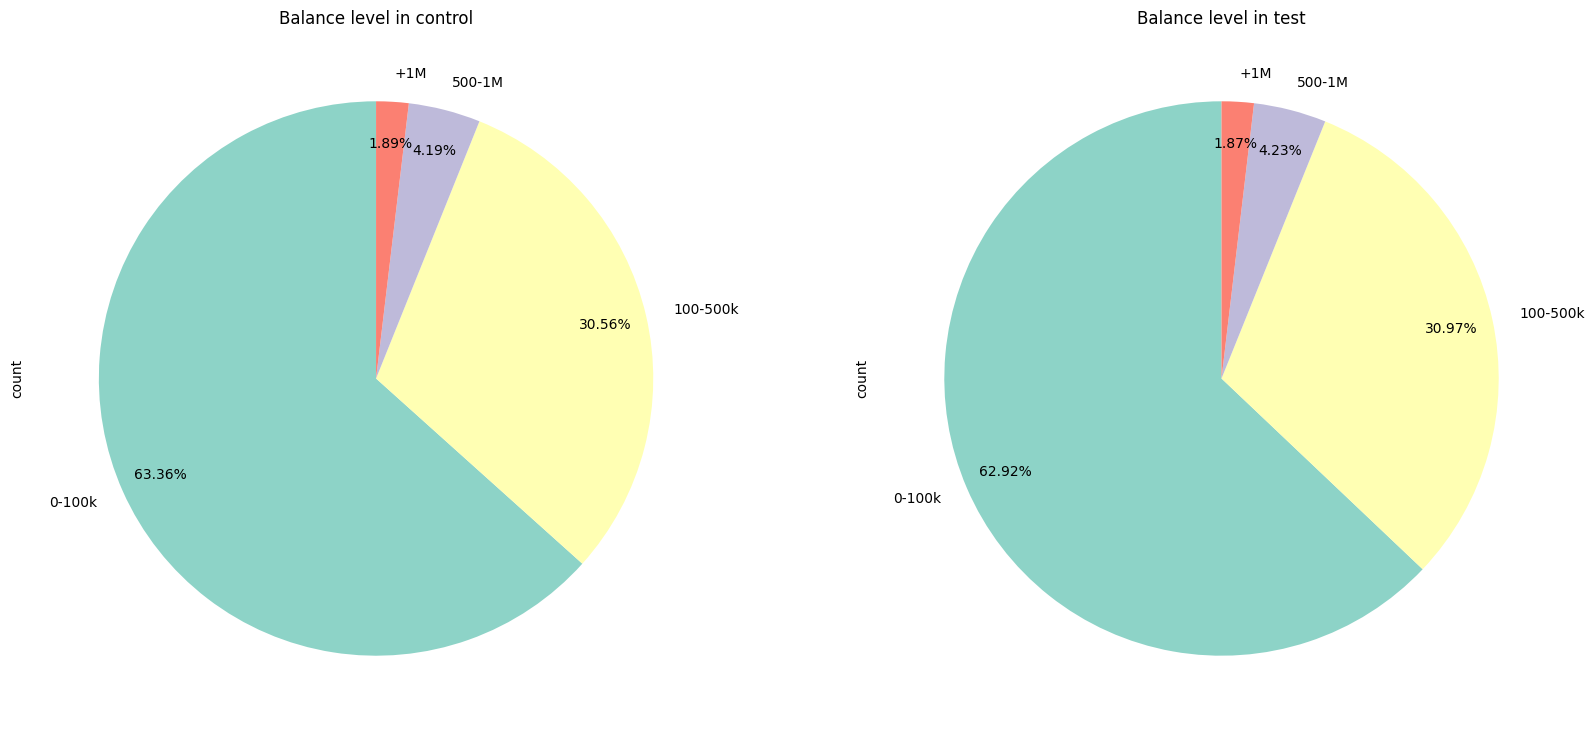

In [22]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
frequency_table_balance_level_control.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1  )

plt.title('Balance level in control')
plt.subplot(1,2,2)
frequency_table_balance_level_test.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1 )
plt.title('Balance level in test')
plt.show()

In [23]:
clientes_control = df_control['client_id'].tolist()
clientes_test = df_test['client_id'].tolist()

both_experiments = []

for i in clientes_control:
    if i in clientes_test: 
        both_experiments.append(i)

KeyboardInterrupt: 

In [ ]:
both_experiments

[]

In [24]:
df_control.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'generation',
       'testing_engagement', 'balance_level', 'tenure', 'Variation',
       'visitor_id', 'visit_id', 'process_step', 'time', 'date'],
      dtype='object')

In [25]:
df_pasos_1 = df_control.groupby(['client_id', 'visit_id', 'process_step'], as_index= False).agg({'time':['min', 'max']})
df_pasos_1

client_id                      visit_id process_step      time  \
                                                                  min   
0           1028  557292053_87239438319_391157        start  18:51:28   
1           1028  557292053_87239438319_391157       step_1  18:52:17   
2           1028  557292053_87239438319_391157       step_2  18:53:29   
3           1028  557292053_87239438319_391157       step_3  18:58:04   
4           1104  543158812_46395476577_767725        start  07:49:18   
...          ...                           ...          ...       ...   
109132   9998346  189177304_69869411700_783154        start  15:25:00   
109133   9998346  189177304_69869411700_783154       step_1  15:26:02   
109134   9998346  189177304_69869411700_783154       step_2  15:26:47   
109135   9998346  189177304_69869411700_783154       step_3  15:28:00   
109136   9998921    378424178_59565976155_8051        start  11:26:31   

                  
             max  
0       18:51:28  
1       19:00:26  
2       19:00:17  
3       18:58:04  
4       07:49:18  
...          ...  
109132  15:25:00  
109133  15:29:55  
109134  15:30:11  
109135  15:37:28  
109136  11:26:31  

[109137 rows x 5 columns]

In [26]:
df_control

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,time,date
11,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,confirm,11:07:16,2017-05-21
12,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_3,11:04:53,2017-05-21
13,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_2,11:04:04,2017-05-21
14,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_1,11:03:31,2017-05-21
15,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,start,11:03:25,2017-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317097,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,confirm,19:06:55,2017-04-12
317098,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_3,19:05:14,2017-04-12
317099,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_2,19:04:29,2017-04-12
317100,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_1,19:04:07,2017-04-12


In [27]:
def time_custom(group):
    if group.name == 'start':
        return group.min()
    else:
        return group.max()
    
    

In [28]:
df_control[['visit_id', 'process_step', 'time']].sort_values(by = ['visit_id', 'process_step']).head(15)

,visit_id,process_step,time
148115,100030127_47967100085_936361,start,11:07:49
226760,100037962_47432393712_705583,start,16:44:03
226762,100037962_47432393712_705583,start,16:43:16
226763,100037962_47432393712_705583,start,16:41:51
226761,100037962_47432393712_705583,step_1,16:43:55
136962,100057941_88477660212_944512,start,11:30:10
136958,100057941_88477660212_944512,step_1,11:33:21
136961,100057941_88477660212_944512,step_1,11:30:40
136957,100057941_88477660212_944512,step_2,11:33:58
136960,100057941_88477660212_944512,step_2,11:31:50


In [29]:
df_control_pasos = df_control.groupby(
    ['client_id', 'visit_id', 'process_step'], as_index=False
).agg({'time': time_custom})
df_control_pasos

,client_id,visit_id,process_step,time
0,1028,557292053_87239438319_391157,start,18:51:28
1,1028,557292053_87239438319_391157,step_1,19:00:26
2,1028,557292053_87239438319_391157,step_2,19:00:17
3,1028,557292053_87239438319_391157,step_3,18:58:04
4,1104,543158812_46395476577_767725,start,07:49:18
...,...,...,...,...
109132,9998346,189177304_69869411700_783154,start,15:25:00
109133,9998346,189177304_69869411700_783154,step_1,15:29:55
109134,9998346,189177304_69869411700_783154,step_2,15:30:11
109135,9998346,189177304_69869411700_783154,step_3,15:37:28


In [32]:
df_control_pasos.dtypes

client_id        int64
visit_id        object
process_step    object
time            object
dtype: object

In [30]:
df_control_pasos = df_control_pasos.sort_values(by=['client_id', 'visit_id', 'time'])

df_control_pasos['time_diff'] = df_control_pasos.groupby(['client_id', 'visit_id'])['time'].diff()
df_control_pasos = df_control_pasos.sort_values(by=['client_id', 'visit_id', 'time', 'process_step'])
df_control_pasos

TypeError: unsupported operand type(s) for -: 'str' and 'str'

## KPIs

### **Completion Rate:** The proportion of users who reach the final ‘confirm’ step.

In [35]:
df_control_cr = df_control[['client_id', 'visit_id', 'process_step', 'time', 'date']]
df_test_cr = df_test[['client_id', 'visit_id', 'process_step', 'time', 'date']]

In [38]:
df_control_cr.sort_values(by=['client_id', 'visit_id', 'time']).head(25)

,client_id,visit_id,process_step,time,date
298528,1028,557292053_87239438319_391157,start,18:51:28,2017-04-08
298527,1028,557292053_87239438319_391157,step_1,18:52:17,2017-04-08
298526,1028,557292053_87239438319_391157,step_1,18:53:20,2017-04-08
298525,1028,557292053_87239438319_391157,step_2,18:53:29,2017-04-08
298524,1028,557292053_87239438319_391157,step_3,18:58:04,2017-04-08
298523,1028,557292053_87239438319_391157,step_1,18:59:55,2017-04-08
298522,1028,557292053_87239438319_391157,step_1,19:00:15,2017-04-08
298521,1028,557292053_87239438319_391157,step_2,19:00:17,2017-04-08
298520,1028,557292053_87239438319_391157,step_1,19:00:26,2017-04-08
130633,1104,543158812_46395476577_767725,start,07:49:18,2017-06-12


In [43]:
df_test['repetition'] = df_test.duplicated(subset=["visit_id", "process_step"], keep="last")
df_test
df_test_no_repetition = df_test[df_test['repetition'] == True]
df_test_no_repetition

C:\Users\Carlota\AppData\Local\Temp\ipykernel_10588\2552643040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['repetition'] = df_test.duplicated(subset=["visit_id", "process_step"], keep="last")


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,time,date,repetition
0,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,11:51:13,2017-04-02,True
1,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,11:47:50,2017-04-02,True
7,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,104438405_2368283624_817211,start,11:02:44,2017-03-29,True
8,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,104438405_2368283624_817211,start,11:01:40,2017-03-29,True
9,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,104438405_2368283624_817211,start,10:59:43,2017-03-29,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317102,5826160,20.0,249.0,56.5,F,2,44837.16,2.0,5.0,boomers,low,0-100k,20-50,Test,903851930_50402388184,842608317_42559400580_37328,confirm,13:24:53,2017-04-05,True
317108,5826160,20.0,249.0,56.5,F,2,44837.16,2.0,5.0,boomers,low,0-100k,20-50,Test,903851930_50402388184,61772393_69755892600_710588,confirm,17:34:52,2017-04-19,True
317110,5826160,20.0,249.0,56.5,F,2,44837.16,2.0,5.0,boomers,low,0-100k,20-50,Test,69579557_2827236069,268191173_38958330991_849725,confirm,19:03:28,2017-05-03,True
317120,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,start,23:58:40,2017-03-30,True


In [46]:
# Test completion rate for test group
df_control = df[df["Variation"] == "Control"]
df_control[df_control["process_step"] == "confirm"]
df_control['repetition'] = df_control.duplicated(subset=["visit_id", "process_step"], keep="last")
df_control
df_control_no_repetition = df_control[df_control['repetition'] == False]
df_control_no_repetition

df_control_confirm = df_control_no_repetition[df_control_no_repetition["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
round(df_control_confirm.shape[0]/df_control.groupby("client_id").agg({"process_step":"count"}).shape[0]*100, 2)

C:\Users\Carlota\AppData\Local\Temp\ipykernel_10588\1564063566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control['repetition'] = df_control.duplicated(subset=["visit_id", "process_step"], keep="last")


65.4

In [48]:
df_control.sort_values(by=['client_id', 'visit_id', 'time'])

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,time,date,repetition
298528,1028,12.0,145.0,36.0,M,3,103520.22,1.0,4.0,millennials,low,100-500k,10-15,Control,42237450_62128060588,557292053_87239438319_391157,start,18:51:28,2017-04-08,False
298527,1028,12.0,145.0,36.0,M,3,103520.22,1.0,4.0,millennials,low,100-500k,10-15,Control,42237450_62128060588,557292053_87239438319_391157,step_1,18:52:17,2017-04-08,False
298526,1028,12.0,145.0,36.0,M,3,103520.22,1.0,4.0,millennials,low,100-500k,10-15,Control,42237450_62128060588,557292053_87239438319_391157,step_1,18:53:20,2017-04-08,True
298525,1028,12.0,145.0,36.0,M,3,103520.22,1.0,4.0,millennials,low,100-500k,10-15,Control,42237450_62128060588,557292053_87239438319_391157,step_2,18:53:29,2017-04-08,False
298524,1028,12.0,145.0,36.0,M,3,103520.22,1.0,4.0,millennials,low,100-500k,10-15,Control,42237450_62128060588,557292053_87239438319_391157,step_3,18:58:04,2017-04-08,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141082,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,low,100-500k,+50,Control,292425655_16607136645,189177304_69869411700_783154,step_2,15:30:11,2017-03-29,True
141081,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,low,100-500k,+50,Control,292425655_16607136645,189177304_69869411700_783154,step_3,15:30:25,2017-03-29,True
141079,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,low,100-500k,+50,Control,292425655_16607136645,189177304_69869411700_783154,step_3,15:37:28,2017-03-29,True
141080,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,low,100-500k,+50,Control,292425655_16607136645,189177304_69869411700_783154,confirm,15:37:28,2017-03-29,False


In [45]:
df_control_confirm

,process_step
client_id,
29595,1
50643,1
58456,2
64871,2
79679,1
...,...
9910139,1
9923135,2
9955114,2
